In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv").drop("Unnamed: 0", axis=1)

#### Sprawdzenie jak radzą sobie lasy losowe

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [14]:
X, y = data.drop("Churn", axis=1).values, data.Churn.values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [33]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=5)

rf_classifier.fit(X_train, y_train);

In [35]:
rf_classifier.score(X_test, y_test)

0.7731152204836416

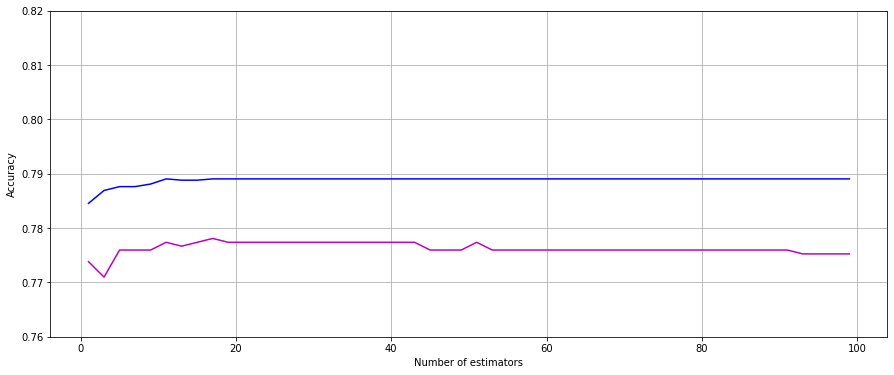

In [36]:
train_scores = []
test_scores = []

for est_param in range(1, 100, 2):
    rf_classifier = RandomForestClassifier(n_estimators = est_param,
                                           random_state = 2022)
    rf_classifier.fit(X_train, y_train);
    
    train_scores.append(rf_classifier.score(X_train, y_train))
    test_scores.append(rf_classifier.score(X_test, y_test))

    
plt.figure(figsize=(15, 6))
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.ylim(0.76, 0.82)

plt.plot(range(1, 100, 2), train_scores, "b")
plt.plot(range(1, 100, 2), test_scores,  "m")
plt.grid()

#### Obserwacja: Liczba estymatorów nie ma większego wpływu na jakość modelu

#### Wniosek: Być może powinniśmy ogarniczyć się do drzewa decyzyjnego

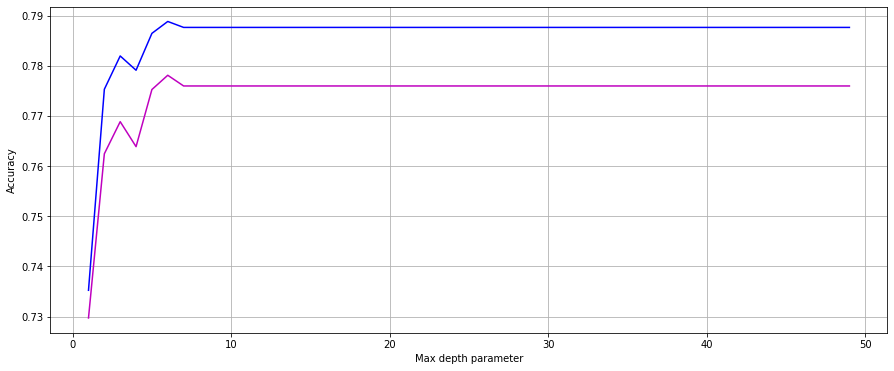

In [37]:
train_scores = []
test_scores = []

for depth_param in range(1, 50, 1):
    rf_classifier = RandomForestClassifier(n_estimators = 5,
                                           max_depth = depth_param,
                                           random_state = 2022)
    rf_classifier.fit(X_train, y_train);
    
    train_scores.append(rf_classifier.score(X_train, y_train))
    test_scores.append(rf_classifier.score(X_test, y_test))

    
plt.figure(figsize=(15, 6))
plt.xlabel("Max depth parameter")
plt.ylabel("Accuracy")

plt.plot(range(1, 50, 1), train_scores, "b")
plt.plot(range(1, 50, 1), test_scores,  "m")
plt.grid()

#### Obserwacja: Zwiększona głębokość drzew nie wpływa na jakość modelu

#### Wniosek: Ograniczyć liczbę głębokości drzew do 10

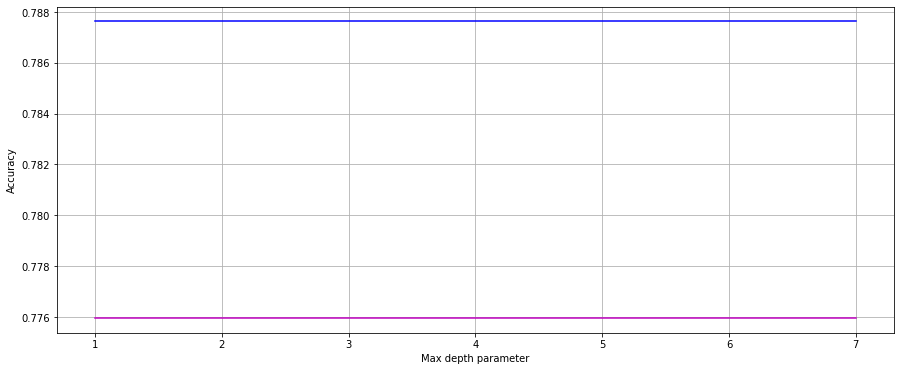

In [38]:
train_scores = []
test_scores = []

for feature_param in range(1, np.shape(X)[1]+1, 1):
    rf_classifier = RandomForestClassifier(n_estimators = 5,
                                           max_depth = 10,
                                           max_features = feature_param,
                                           random_state = 2022)
    rf_classifier.fit(X_train, y_train);
    
    train_scores.append(rf_classifier.score(X_train, y_train))
    test_scores.append(rf_classifier.score(X_test, y_test))

    
plt.figure(figsize=(15, 6))
plt.xlabel("Max depth parameter")
plt.ylabel("Accuracy")

plt.plot(range(1, np.shape(X)[1]+1, 1), train_scores, "b")
plt.plot(range(1, np.shape(X)[1]+1, 1), test_scores,  "m")
plt.grid()

In [48]:
rf_classifier = RandomForestClassifier(n_estimators = 5,
                                           max_depth = 10,
                                           random_state = 44)

rf_classifier.fit(X_train, y_train);

In [49]:
y_pred = rf_classifier.predict(X_test)

f1_score(y_test, y_pred)

0.554945054945055

In [52]:
rf_classifier.score(X_test, y_test)

0.7695590327169275